* Taxi V3: https://gymnasium.farama.org/environments/toy_text/taxi/
* Q-learning: https://en.wikipedia.org/wiki/Q-learning

# Libraries

In [1]:
import gymnasium
import matplotlib.pyplot as pyplot
import numpy
import random

from IPython.display import clear_output

# Environment

In [2]:
environment = gymnasium.make("Taxi-v3", render_mode="rgb_array").env

# Learning Process

## Parameters

In [3]:
alpha    = 0.1
gamma    = 0.6
epsilon  = 0.1
episodes = 100000

## Q-table

In [4]:
q_table = numpy.zeros([environment.observation_space.n, environment.action_space.n])

## Training

In [5]:
for i in range(episodes):
    state, _ = environment.reset()

    done=False
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = environment.action_space.sample()
        else:
            action = numpy.argmax(q_table[state])

        next_state, reward, done, truncated, info = environment.step(action)

        old_value = q_table[state, action]
        next_max  = numpy.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        
        q_table[state, action] = new_value
        
        state = next_state

    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

clear_output(wait=True)
print("Training finished.")

Training finished.


# Testing

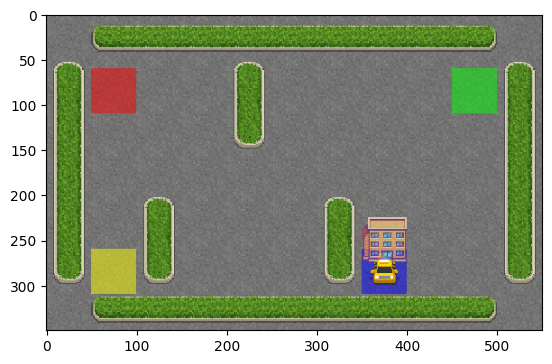

Steps taken: 13
Final score: 8
Penalties:   0


In [6]:
environment.reset()

score, steps, penalties, reward = 0, 0, 0, 0

done=False
while not done:
    steps += 1
    action = numpy.argmax(q_table[state])
    state, reward, done, truncated, info = environment.step(action)
    score += reward
    if reward == -10:
        penalties += 1

    clear_output(wait=True)
    pyplot.imshow(environment.render())
    pyplot.show()

print(f"Steps taken: {steps}")
print(f"Final score: {score}")
print(f"Penalties:   {penalties}")

# Saving

In [7]:
numpy.save("Learning", q_table)